In [222]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import *
import pandas as pd

In [223]:
def mat(theta, phi):
    return np.matrix([[cos(theta), sin(theta)*exp(-1j*phi)],[sin(theta)*exp(1j*phi), -cos(theta)]])

In [447]:
np.linalg.eig(mat(pi/2,pi/4))[1].T[0]

matrix([[ 0.50000000-0.5j,  0.70710678+0.j ]])

In [425]:
def normalized_dot_product(a,b):
    prod = np.vdot(a,b)
    print(prod, np.abs(prod))
    return prod/np.abs(prod)

In [416]:
ROUNDING_DIGITS = 5
class Point:
    def __init__(self, string):
        x,y,z = map(float,string.split()[:3])
        self.x, self.y, self.z  = x,y,z 
        self.theta = round(np.arccos(z/(x**2+y**2+z**2)),6)
        self.phi = round(np.arctan2(x,y),6)
        self.matrix = mat(self.theta, self.phi)
        self.eig = np.linalg.eig(self.matrix)
        self.vals = self.eig[0]
        self.vecs = self.eig[1].T
    def __repr__(self):
        return "<θ={},φ={}>".format(self.theta, self.phi)

class Vertex:
    def __init__(self, string):
        n = int(string.split()[0])
        idx = map(int, string.split()[1:1+n])
        self.points = [points[i] for i in idx]
        self.n = n 
        self.sort()
    def calc(self, j):
        res = 1
        for i in range(self.n):
            vec_1 = self.points[i].vecs[j]
            vec_2 = self.points[(i+1)%self.n].vecs[j]
            res *= normalized_dot_product(vec_1,vec_2)
        return np.log(res[0][0])
    def plot(self):
        ax = Axes3D(plt.figure())
        for color, point in zip("rgby",self.points):
            ax.scatter3D([point.x],[point.y],[point.z], s=50, c=color)
    def sort(self):
        if self.n != 4: return 
        self.points.sort(key = lambda x:(-x.theta, x.phi))
        minimum, a, b, maximum = self.points
        if a.phi > b.phi:
            self.points = [minimum, a,maximum, b]
        else :
            self.points = [minimum, b,maximum, a]
        
    def __repr__(self):
        return "<{}>".format(str.join("\n", map(repr,self.points)))

In [417]:
from itertools import count
points = []
vertexes = []
with open("./sphere_data.txt") as f:
    for line in f:
        if line.startswith("END"):
            break
        points.append(Point(line))
    for line in f:
        vertexes.append(Vertex(line))
    


In [418]:
xs = [i.x for i in points]
ys = [i.y for i in points]
zs = [i.z for i in points]
phi = [i.phi for i in points]
theta = [i.theta for i in points]
df = pd.DataFrame(list(zip(xs,ys,zs,phi, theta)), columns=["x","y","z","phi","theta"])

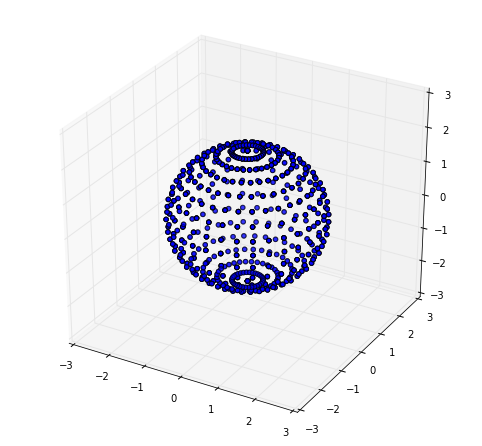

In [419]:
ax = Axes3D(plt.figure())
ax.scatter3D(xs, ys, zs)

In [420]:
np.round(sum(i.calc(0) for i in vertexes if i.n==4).item(0,0),4)

(-0+0j)

In [421]:
v = vertexes[400]

In [422]:
print(v)

<<θ=1.469635,φ=-2.356194>
<θ=1.469635,φ=-2.159845>
<θ=1.371381,φ=-2.159845>
<θ=1.371381,φ=-2.356195>>


In [427]:
p1,p2,p3,p4 = v.points

In [433]:
print (p1.vecs[0])
print(p2.vecs[0])

[[ 0.74195312+0.j         -0.47408075-0.47408122j]]
[[ 0.74195312+0.j         -0.37248307-0.55746025j]]


In [426]:
print((normalized_dot_product(v.points[0].vecs[0], v.points[1].vecs[0])),
(normalized_dot_product(v.points[1].vecs[0], v.points[2].vecs[0])),
(normalized_dot_product(v.points[2].vecs[0], v.points[3].vecs[0])),
(normalized_dot_product(v.points[3].vecs[0], v.points[0].vecs[0])))

[[ 0.55049444+0.j]] [[ 0.55049444]]
[[ 0.57425836+0.j]] [[ 0.57425836]]
[[ 0.59904814+0.j]] [[ 0.59904814]]
[[ 0.57425836+0.j]] [[ 0.57425836]]
[[ 1.+0.j]] [[ 1.+0.j]] [[ 1.+0.j]] [[ 1.+0.j]]


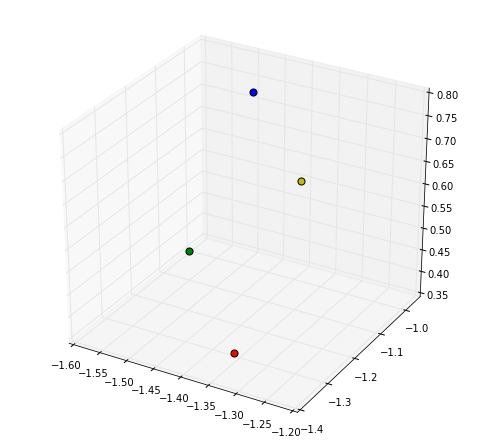

In [424]:
v.plot()

In [401]:
v = vertexes[200]
print(v.points[0].vecs[0], v.points[1].vecs[0])
print(v.points[1].vecs[0], v.points[2].vecs[0])
print(v.points[2].vecs[0], v.points[3].vecs[0])
print(v.points[3].vecs[0], v.points[0].vecs[0])

[[ 0.85972286+0.j         0.19545934+0.4718816j]] [[ 0.85972286+0.j         0.09964388+0.5009468j]]
[[ 0.85972286+0.j         0.09964388+0.5009468j]] [[ 0.86824667+0.j          0.09679060+0.48659973j]]
[[ 0.86824667+0.j          0.09679060+0.48659973j]] [[ 0.86824667+0.j          0.18986236+0.45836667j]]
[[ 0.86824667+0.j          0.18986236+0.45836667j]] [[ 0.85972286+0.j         0.19545934+0.4718816j]]
